In [1]:
import json
from sklearn.manifold import TSNE
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("./data/svd_vocab.json") as f:
    vocab = json.load(f)

In [3]:
with open("./data/model.json") as f:
    model = json.load(f)

In [4]:
similarity={}
for word in vocab:
    a = model["camera"]
    b = model[word]
    if word == "camera":
        continue
    similarity[word]= np.dot(a, b)/(norm(a)*norm(b))

In [5]:
sorted_words = [k for k, v in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]

In [6]:
sorted_words[:20]

['camer',
 'camcorder',
 'cam',
 'camara',
 'scope',
 'microscope',
 'monopod',
 'telescope',
 'binocular',
 'board',
 'tripod',
 'detector',
 'lx5',
 'gorillapod',
 'cameraand',
 'softbox',
 'camers',
 'photography',
 'kx',
 'gh2']

In [7]:
test_words= ["tv","sleeping","bed","room","bedroom","night","camcorder","camera","photographer","clarity","video","refridgerator","pizza","cool","kitchen","wife"]
X=[model[w] for w in test_words]

In [8]:
X = TSNE(n_components=2).fit_transform(X)

In [9]:
y = [i[1] for i in X]
x = [i[0] for i in X]

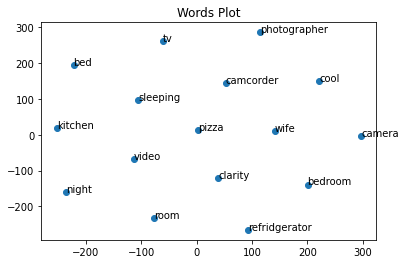

In [10]:
plt.scatter(x,y)
plt.title("Words Plot")
for i, label in enumerate(test_words):
    plt.annotate(label, (x[i], y[i]))
plt.show()